In [1]:
import seaborn as sns
df=sns.load_dataset('tips')
df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
import pandas as pd
import numpy as np


In [3]:
df['time'].value_counts
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['sex']=l.fit_transform(df['sex'])
df['smoker']=l.fit_transform(df['smoker'])
df['time']=l.fit_transform(df['time'])
df['day']=l.fit_transform(df['day'])


In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [5]:
type(df)

pandas.core.frame.DataFrame

In [8]:
x=df.drop(columns=['time'])

In [9]:
x

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,0,0,2,2
1,10.34,1.66,1,0,2,3
2,21.01,3.50,1,0,2,3
3,23.68,3.31,1,0,2,2
4,24.59,3.61,0,0,2,4
...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,3
240,27.18,2.00,0,1,1,2
241,22.67,2.00,1,1,1,2
242,17.82,1.75,1,0,1,2


In [10]:
y=df['time']

In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Name: time, Length: 244, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [25]:
x_train

,total_bill,tip,sex,smoker,day,size
115,17.31,3.50,0,0,2,2
181,23.33,5.65,1,1,2,2
225,16.27,2.50,0,1,0,2
68,20.23,2.01,1,0,1,2
104,20.92,4.08,0,0,1,2
...,...,...,...,...,...,...
106,20.49,4.06,1,1,1,2
14,14.83,3.02,0,0,2,2
92,5.75,1.00,0,1,0,2
179,34.63,3.55,1,1,2,2


In [26]:
y_train

115    0
181    0
225    1
68     0
104    0
      ..
106    0
14     0
92     0
179    0
102    0
Name: time, Length: 183, dtype: int32

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt_clf=dt.fit(x_train,y_train)

In [29]:
dt_clf

DecisionTreeClassifier(max_depth=3, random_state=42)

In [30]:
from sklearn.metrics import accuracy_score,classification_report

In [31]:
accuracy=accuracy_score(y_test,dt_clf.predict(x_test))

In [32]:
accuracy

0.9344262295081968

In [33]:
classification=classification_report(y_test,dt_clf.predict(x_test))

In [34]:
classification

'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95        44\n           1       0.88      0.88      0.88        17\n\n    accuracy                           0.93        61\n   macro avg       0.92      0.92      0.92        61\nweighted avg       0.93      0.93      0.93        61\n'

[Text(0.5, 0.875, 'x[4] <= 2.5\ngini = 0.402\nsamples = 183\nvalue = [132, 51]'),
 Text(0.3, 0.625, 'x[4] <= 0.5\ngini = 0.096\nsamples = 138\nvalue = [131, 7]'),
 Text(0.2, 0.375, 'x[0] <= 16.295\ngini = 0.492\nsamples = 16\nvalue = [9, 7]'),
 Text(0.1, 0.125, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 122\nvalue = [122, 0]'),
 Text(0.7, 0.625, 'x[0] <= 18.53\ngini = 0.043\nsamples = 45\nvalue = [1, 44]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.8, 0.375, 'x[0] <= 18.93\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]')]

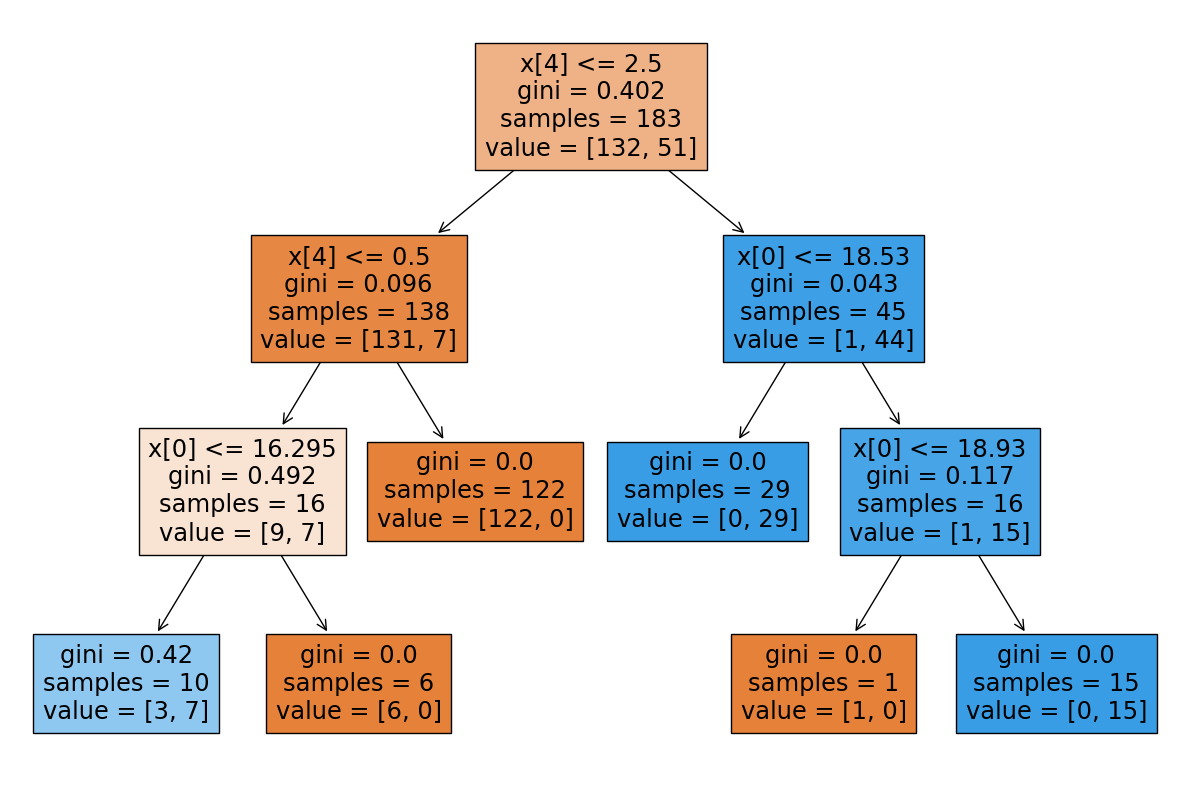

In [39]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf,filled=True)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier()

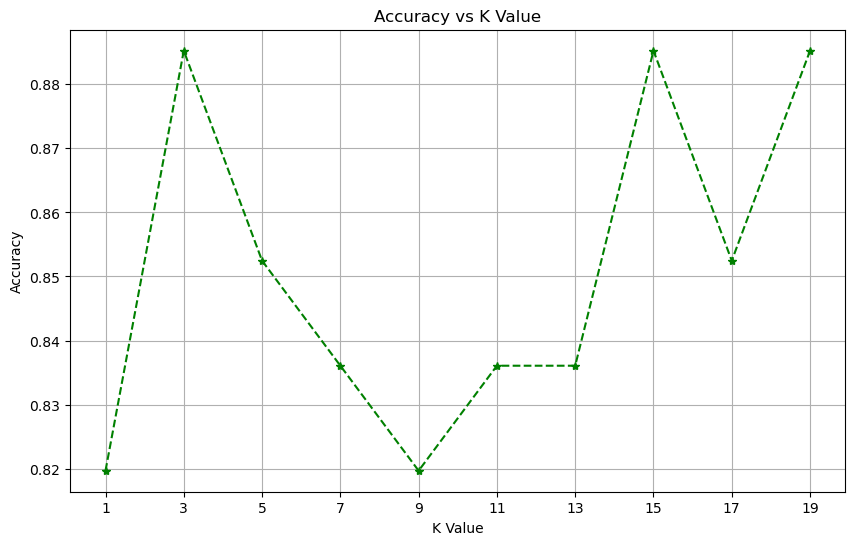

In [49]:

k_values = list(range(1, 21, 2))
accurancy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    accurancy_scores.append(accuracy)

# Plotting accurancy_scores against k_values after the loop
plt.figure(figsize=(10, 6))
plt.plot(k_values, accurancy_scores, marker='*', linestyle='--', color='g')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [56]:
knn=KNeighborsClassifier(n_neighbors=3)
knn_clf=knn.fit(x_train,y_train)

In [57]:
scores=accuracy_score(y_test,knn_clf.predict(x_test))

In [58]:
classification=classification_report(y_test,knn_clf.predict(x_test))

In [59]:
scores

0.8852459016393442

In [60]:
classification

'              precision    recall  f1-score   support\n\n           0       0.89      0.95      0.92        44\n           1       0.86      0.71      0.77        17\n\n    accuracy                           0.89        61\n   macro avg       0.88      0.83      0.85        61\nweighted avg       0.88      0.89      0.88        61\n'